In [1]:
import numpy as np
import networkx as nx
import os
from random import shuffle          # importamos las librerias necesarias
import matplotlib.pylab as plt       
%matplotlib inline
from matplotlib.pyplot import title,xlabel,ylabel,show

In [2]:
G = nx.read_gml('dolphins.gml') # definimos la red:cada nodo es un delfin y cada conexion representa una interaccion

In [3]:
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

dolphinsGender=ldata('dolphinsGender.txt') # usamos la funcion "ldata" para abrir el archivo .txt 

In [4]:
dict_gender = {dolphin_nombre : genero for dolphin_nombre, genero  in dolphinsGender}
for n in G.nodes:
    G.nodes[n]["gender"] = dict_gender[n] 

# PARTICION EN CLUSTERS

In [7]:
#import igraph as igraph
import networkx as nx
#import community
import time

In [9]:
def calculate_info_fast(np_adj_list, method):
    g = igraph.Graph.Weighted_Adjacency(np_adj_list.tolist(),mode=igraph.ADJ_UPPER)
   
    t0=time.time()
    if method=="infomap":
        labels = g.community_infomap(edge_weights="weight").membership

    if method=="fastgreedy":
        labels = g.community_fastgreedy(weights="weight").as_clustering().membership
                     
    return labels

In [10]:
def AssingCommunities(G,comunidades,name_coms): #comunidades=lista de diccionarios de comunidades
    for name in name_coms:
        for n in G.nodes():
            G.nodes[n][name]=comunidades[0][n]

In [11]:
def Communities(G,labels,name_coms): #laabels=lista de labels de comunidades
    Communities=[]
    for k in range(len(labels)):
        nodos_por_comunidad=[]
        for i in range(len(set(labels[k]))):
            nodos=[]
            for nodo in G.nodes():
                if i==nx.get_node_attributes(G,name_coms[k])[nodo]:
                    nodos.append(nodo)
            nodos_por_comunidad.append(nodos)
        Communities.append(nodos_por_comunidad)
    return(Communities)

COMUNIDADES CON TODOS LOS CRITERIOS

In [12]:
def all_communities(G):
    
    A=nx.to_numpy_matrix(G)
    
    labels_infomap=calculate_info_fast(A,method='infomap')
    dict_comun_infomap=dict(zip(list(G.nodes()),labels_infomap))

    labels_fastg=calculate_info_fast(A,method='fastgreedy')
    dict_comun_fastg=dict(zip(list(G.nodes()),labels_fastg))

    dict_comun_louvain = community.best_partition(G)
    labels_louvain=list(dict_comun_louvain.values())
    
    comunidades=[dict_comun_infomap, dict_comun_fastg, dict_comun_louvain] #adentro de la lista v an todos los diccionarios
    
    global name_coms
    name_coms=['comunidad_infomap','comunidad_fastg','comunidad_louvain'] #,'comunidad_betw']
    
    AssingCommunities(G,comunidades,name_coms)
    
    labels=[labels_infomap,labels_fastg,labels_louvain] #,labels_betw]
    
    #all_coms=Communities(G,labels,name_coms) #esto va adentro de modularity...lista de listas jaja
    
    return labels#all_coms

In [10]:
listadelistas=all_communities(G)

PLOT

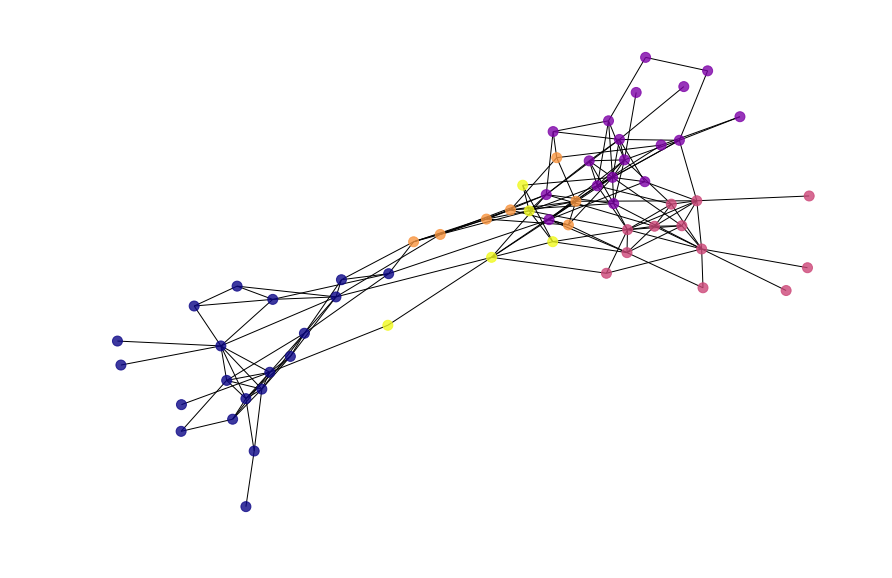

In [11]:
plt.figure(figsize=(15,10))
pos = nx.spring_layout(G) 
        
nx.draw_networkx_nodes(G,pos,
                       cmap=plt.get_cmap('plasma'),
                       node_color=list(dict(nx.get_node_attributes(G,name_coms[1])).values()),
                       node_size=100,
                       alpha=0.8)

#width = 1+10*np.array(list(networkx.get_edge_attributes(g,'weight').values())).ravel()
#edge_color = np.random.uniform(size=len(width))

nx.draw_networkx_edges(G,pos)#"grey")
#plt.title("A bizarre graph")
plt.axis("off")
plt.show()

MODULARITY

In [13]:
from __future__ import division

from functools import wraps
from itertools import product

import networkx as nx
from networkx import NetworkXError
from networkx.utils import not_implemented_for
from networkx.algorithms.community.community_utils import is_partition

__all__ = ['coverage', 'modularity', 'performance']

class NotAPartition(NetworkXError):
    """Raised if a given collection is not a partition.

    """

    def __init__(self, G, collection):
        msg = '{} is not a valid partition of the graph {}'
        msg = msg.format(G, collection)
        super(NotAPartition, self).__init__(msg)


def modularity(G, communities, weight='weight'):
    
    if not is_partition(G, communities):
        raise NotAPartition(G, communities)

    multigraph = G.is_multigraph()
    directed = G.is_directed()
    m = G.size(weight=weight)
    if directed:
        out_degree = dict(G.out_degree(weight=weight))
        in_degree = dict(G.in_degree(weight=weight))
        norm = 1 / m
    else:
        out_degree = dict(G.degree(weight=weight))
        in_degree = out_degree
        norm = 1 / (2 * m)

    def val(u, v):
        try:
            if multigraph:
                w = sum(d.get(weight, 1) for k, d in G[u][v].items())
            else:
                w = G[u][v].get(weight, 1)
        except KeyError:
            w = 0
        # Double count self-loops if the graph is undirected.
        if u == v and not directed:
            w *= 2
        return w - in_degree[u] * out_degree[v] * norm

    Q = sum(val(u, v) for c in communities for u, v in product(c, repeat=2))
    return Q * norm

FUNCION FINAL :O

In [13]:
# DistributionModularity = []                          # Vector para guardar las modularidades de cada iteracion
 
# it = 2                                           # numero de iteraciones 
# swaps = 70
# Grafo = G.copy()                      

# for i in range(it):
#     #Generar grafo recableado
#     list_degrees=list(dict(Grafo.degree).values())
#     GR=nx.configuration_model(list_degrees,create_using=nx.Graph)
#     #Calcular los clusters usando TODOS los criterios
#     lista_listas=all_communities(GR)
#     #Calcular Mod y no se que ... 
#     for i in range(len(lista_listas))
#     modularity(GR,)

In [14]:
lista_listas=all_communities(G)

In [15]:
lista_listas[1]

[['Beescratch',
  'DN16',
  'DN21',
  'DN63',
  'Feather',
  'Gallatin',
  'Jet',
  'Knit',
  'MN23',
  'Mus',
  'Notch',
  'Number1',
  'Quasi',
  'Ripplefluke',
  'SN90',
  'TR82',
  'Upbang',
  'Wave',
  'Web',
  'Zig'],
 ['Fork',
  'Grin',
  'Hook',
  'Kringel',
  'Scabs',
  'Shmuddel',
  'SN4',
  'SN63',
  'SN9',
  'Stripes',
  'Thumper',
  'TR120',
  'TR88',
  'TR99',
  'TSN103',
  'TSN83',
  'Whitetip',
  'Zipfel'],
 ['Cross',
  'Five',
  'Haecksel',
  'Jonah',
  'MN105',
  'MN60',
  'MN83',
  'Patchback',
  'SMN5',
  'Topless',
  'Trigger',
  'Vau'],
 ['Beak', 'Bumper', 'Fish', 'Oscar', 'PL', 'SN96', 'TR77']]

In [16]:
len(lista_listas[1][1])+len(lista_listas[1][0])+len(lista_listas[1][2])+len(lista_listas[1][3])

57

In [17]:
len(G.nodes())

62

In [18]:
modularity(G,lista_listas[0])

0.5277283335311076

In [19]:
modularity(G,lista_listas[1])

NotAPartition:  is not a valid partition of the graph [['Beescratch', 'DN16', 'DN21', 'DN63', 'Feather', 'Gallatin', 'Jet', 'Knit', 'MN23', 'Mus', 'Notch', 'Number1', 'Quasi', 'Ripplefluke', 'SN90', 'TR82', 'Upbang', 'Wave', 'Web', 'Zig'], ['Fork', 'Grin', 'Hook', 'Kringel', 'Scabs', 'Shmuddel', 'SN4', 'SN63', 'SN9', 'Stripes', 'Thumper', 'TR120', 'TR88', 'TR99', 'TSN103', 'TSN83', 'Whitetip', 'Zipfel'], ['Cross', 'Five', 'Haecksel', 'Jonah', 'MN105', 'MN60', 'MN83', 'Patchback', 'SMN5', 'Topless', 'Trigger', 'Vau'], ['Beak', 'Bumper', 'Fish', 'Oscar', 'PL', 'SN96', 'TR77']]

In [20]:
lista_listas[1]

[['Beescratch',
  'DN16',
  'DN21',
  'DN63',
  'Feather',
  'Gallatin',
  'Jet',
  'Knit',
  'MN23',
  'Mus',
  'Notch',
  'Number1',
  'Quasi',
  'Ripplefluke',
  'SN90',
  'TR82',
  'Upbang',
  'Wave',
  'Web',
  'Zig'],
 ['Fork',
  'Grin',
  'Hook',
  'Kringel',
  'Scabs',
  'Shmuddel',
  'SN4',
  'SN63',
  'SN9',
  'Stripes',
  'Thumper',
  'TR120',
  'TR88',
  'TR99',
  'TSN103',
  'TSN83',
  'Whitetip',
  'Zipfel'],
 ['Cross',
  'Five',
  'Haecksel',
  'Jonah',
  'MN105',
  'MN60',
  'MN83',
  'Patchback',
  'SMN5',
  'Topless',
  'Trigger',
  'Vau'],
 ['Beak', 'Bumper', 'Fish', 'Oscar', 'PL', 'SN96', 'TR77']]

In [ ]:
modularity(G,lista_listas[2])

In [23]:
all_labels=all_communities(G)

In [33]:
comunidad_infomap=Communities(G,[all_labels[0]],[name_coms[0]])
comunidad_fast=Communities(G,[all_labels[1]],[name_coms[1]])

In [34]:
comunidad_fast

[[['Beescratch',
   'DN16',
   'DN21',
   'DN63',
   'Feather',
   'Gallatin',
   'Jet',
   'Knit',
   'MN23',
   'Mus',
   'Notch',
   'Number1',
   'Quasi',
   'Ripplefluke',
   'SN90',
   'TR82',
   'Upbang',
   'Wave',
   'Web',
   'Zig'],
  ['Fork',
   'Grin',
   'Hook',
   'Kringel',
   'Scabs',
   'Shmuddel',
   'SN4',
   'SN63',
   'SN9',
   'Stripes',
   'Thumper',
   'TR120',
   'TR88',
   'TR99',
   'TSN103',
   'TSN83',
   'Whitetip',
   'Zipfel'],
  ['Cross',
   'Five',
   'Haecksel',
   'Jonah',
   'MN105',
   'MN60',
   'MN83',
   'Patchback',
   'SMN5',
   'Topless',
   'Trigger',
   'Vau'],
  ['Beak', 'Bumper', 'Fish', 'Oscar', 'PL', 'SN96', 'TR77']]]

# CALCULO EDGE BETWEENNESS 

In [14]:
comp = list(nx.algorithms.community.centrality.girvan_newman(G))

Modularity = []
for communities in comp:
    m = modularity(G, [list(c) for c in communities])
    Modularity.append(m)


In [15]:
Modularity 

[0.3787033740753901,
 0.38149202958743605,
 0.45807127882599297,
 0.5193821446936416,
 0.5139234998615543,
 0.5175625964162794,
 0.4907242593251833,
 0.49380958031723277,
 0.4895573751038316,
 0.48528539219176353,
 0.4804596337170198,
 0.47541632055693916,
 0.4703532296981916,
 0.4650528064554403,
 0.45996993789802576,
 0.45557928879395554,
 0.44930975831652187,
 0.43906491040702467,
 0.4270796250148328,
 0.41477789644396956,
 0.4055812665638226,
 0.3948221984889841,
 0.3854080139235001,
 0.37615205094735205,
 0.36590720303785473,
 0.3555436889363555,
 0.3376250939440688,
 0.3178671729757527,
 0.30738499268225156,
 0.29530081879672493,
 0.28499663779122675,
 0.2789051066017959,
 0.26280605988687156,
 0.25030655432933824,
 0.23867726751315216,
 0.22277599778489776,
 0.20796250148332743,
 0.18790791503500648,
 0.18173727305090773,
 0.16605355800799015,
 0.16101024484790943,
 0.142814762074285,
 0.1280408211700486,
 0.1153039832285115,
 0.10399113959099716,
 0.08714054032672754,
 0.080910

In [134]:
#ME QUEDO CON LA MEJOR MODULARIDAD 

In [65]:
#voy a hacer un grafico donde pongo los valores de la modularidad en funcion de la cantidad de comunidades...
AmountCommunities = []
for i in range(len(Modularity)):
    amountCommunities = len(comp[i])
    AmountCommunities.append(amountCommunities)

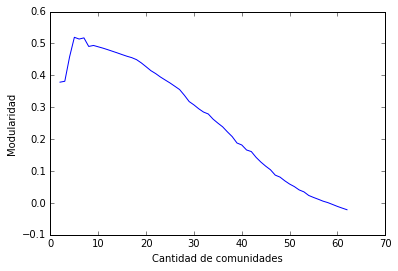

In [76]:
plt.plot(AmountCommunities, Modularity)
plt.xlabel("Cantidad de comunidades")
plt.ylabel("Modularidad")

In [16]:
bestCommunityBetEdg = tuple(sorted(c) for c in comp)[np.argmax(Modularity)]

In [37]:
np.argmax(Modularity)

3

In [72]:
comp[20]

({'Ripplefluke', 'Zig'},
 {'Beescratch', 'Mus', 'Notch', 'Number1'},
 {'Haecksel',
  'Jonah',
  'MN105',
  'MN60',
  'MN83',
  'Patchback',
  'Topless',
  'Trigger'},
 {'Jet', 'MN23', 'Quasi'},
 {'Grin',
  'Hook',
  'Kringel',
  'SN4',
  'SN63',
  'SN9',
  'Scabs',
  'Shmuddel',
  'Stripes',
  'TR99'},
 {'TSN83', 'Zipfel'},
 {'Cross'},
 {'Vau'},
 {'DN16', 'DN21', 'Feather', 'Gallatin', 'SN90', 'Upbang', 'Wave', 'Web'},
 {'Beak', 'Bumper', 'Fish', 'Oscar', 'PL', 'SN96', 'TR77'},
 {'SN100'},
 {'SN89'},
 {'TSN103'},
 {'Five'},
 {'CCL', 'Double', 'Zap'},
 {'TR120', 'TR88'},
 {'Fork'},
 {'DN63', 'Knit'},
 {'Whitetip'},
 {'SMN5'},
 {'TR82'},
 {'Thumper'})

In [17]:
bestCommunityBetEdg

[{'Beescratch',
  'DN16',
  'DN21',
  'DN63',
  'Feather',
  'Gallatin',
  'Jet',
  'Knit',
  'MN23',
  'Mus',
  'Notch',
  'Number1',
  'Quasi',
  'Ripplefluke',
  'SN89',
  'SN90',
  'TR82',
  'Upbang',
  'Wave',
  'Web',
  'Zig'},
 {'Cross',
  'Five',
  'Haecksel',
  'Jonah',
  'MN105',
  'MN60',
  'MN83',
  'Patchback',
  'SMN5',
  'Topless',
  'Trigger',
  'Vau'},
 {'CCL',
  'Double',
  'Fork',
  'Grin',
  'Hook',
  'Kringel',
  'SN100',
  'SN4',
  'SN63',
  'SN9',
  'Scabs',
  'Shmuddel',
  'Stripes',
  'TR120',
  'TR88',
  'TR99',
  'TSN103',
  'Thumper',
  'Whitetip',
  'Zap'},
 {'TSN83', 'Zipfel'},
 {'Beak', 'Bumper', 'Fish', 'Oscar', 'PL', 'SN96', 'TR77'}]

In [36]:
with open("file.txt", "w") as output:
    output.write(str(bestCommunityBetEdg))

In [25]:
#len(bestCommunityBetEdg)
list(bestCommunityBetEdg[2])[1]

'Zap'

In [29]:
def AssingCommunities(G,comunidades): #comunidades=lista de diccionarios de comunidades
    for n in range(len(comunidades)):
        for i in list(comunidades[n]):
            G.nodes[i]["betweenness"]=n

In [30]:
edgeBetweeness = AssingCommunities(G,bestCommunityBetEdg)

In [133]:
dictAttrib = nx.get_node_attributes(G,"betweenness")
dictAttrib

{'Beak': 4,
 'Beescratch': 0,
 'Bumper': 4,
 'CCL': 2,
 'Cross': 1,
 'DN16': 0,
 'DN21': 0,
 'DN63': 0,
 'Double': 2,
 'Feather': 0,
 'Fish': 4,
 'Five': 1,
 'Fork': 2,
 'Gallatin': 0,
 'Grin': 2,
 'Haecksel': 1,
 'Hook': 2,
 'Jet': 0,
 'Jonah': 1,
 'Knit': 0,
 'Kringel': 2,
 'MN105': 1,
 'MN23': 0,
 'MN60': 1,
 'MN83': 1,
 'Mus': 0,
 'Notch': 0,
 'Number1': 0,
 'Oscar': 4,
 'PL': 4,
 'Patchback': 1,
 'Quasi': 0,
 'Ripplefluke': 0,
 'SMN5': 1,
 'SN100': 2,
 'SN4': 2,
 'SN63': 2,
 'SN89': 0,
 'SN9': 2,
 'SN90': 0,
 'SN96': 4,
 'Scabs': 2,
 'Shmuddel': 2,
 'Stripes': 2,
 'TR120': 2,
 'TR77': 4,
 'TR82': 0,
 'TR88': 2,
 'TR99': 2,
 'TSN103': 2,
 'TSN83': 3,
 'Thumper': 2,
 'Topless': 1,
 'Trigger': 1,
 'Upbang': 0,
 'Vau': 1,
 'Wave': 0,
 'Web': 0,
 'Whitetip': 2,
 'Zap': 2,
 'Zig': 0,
 'Zipfel': 3}

In [132]:
with open("file2.txt", "w") as output:
    output.write(str(dictAttrib))

In [ ]:
bet_valor=[j for (i,j) in G.nodes('betweenness')]

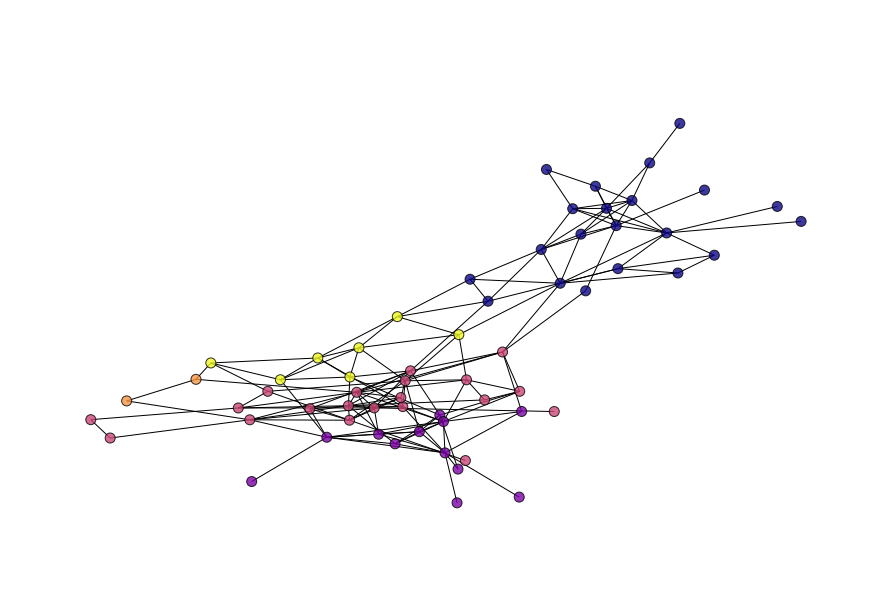

In [55]:
plt.figure(figsize=(15,10))
pos = nx.spring_layout(G) 
        
nx.draw_networkx_nodes(G,pos,
                       cmap=plt.get_cmap('plasma'),
                       node_color=bet_valor,
                       node_size=100,
                       alpha=0.8)

#width = 1+10*np.array(list(networkx.get_edge_attributes(g,'weight').values())).ravel()
#edge_color = np.random.uniform(size=len(width))

nx.draw_networkx_edges(G,pos)#"grey")
#plt.title("A bizarre graph")
plt.axis("off")
plt.show()

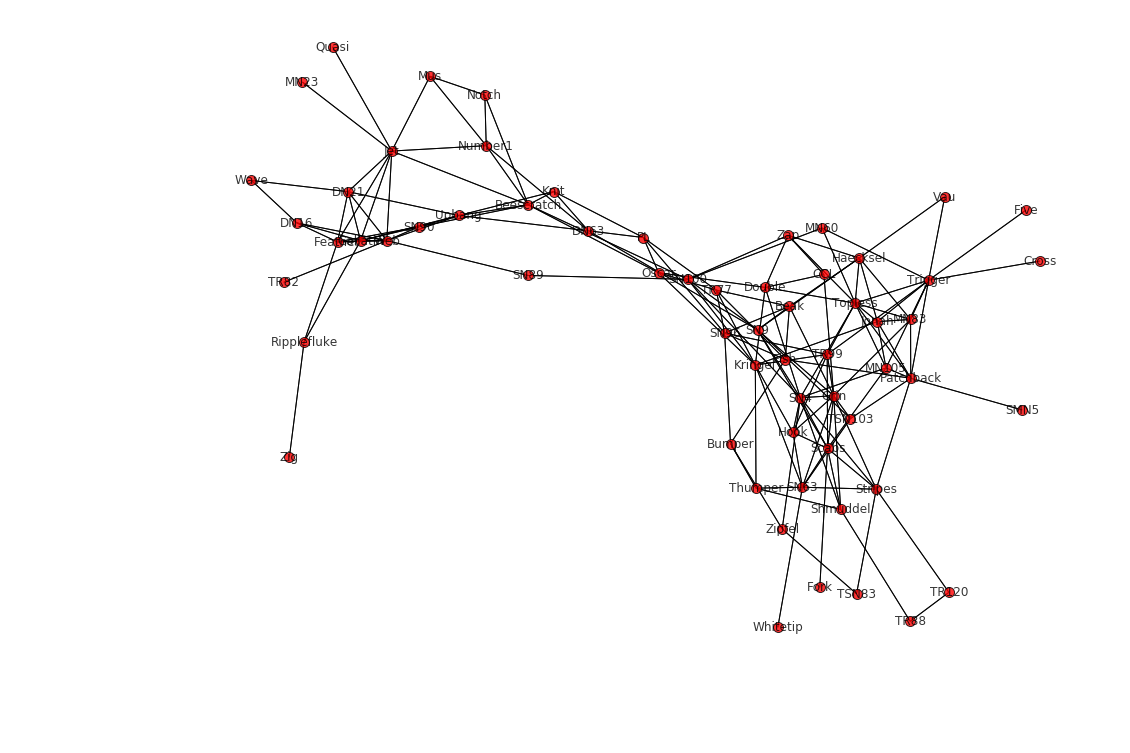

In [46]:
plt.figure(figsize=(15,10))
pos = nx.spring_layout(G) 
        
nx.draw(G,pos,
                       with_labels = True,
                       #cmap=plt.get_cmap('plasma'),
                       #node_color=list(dict(nx.get_node_attributes(G,"betweenness")).values()),
                       node_size=100,
                       alpha=0.8)

#width = 1+10*np.array(list(networkx.get_edge_attributes(g,'weight').values())).ravel()
#edge_color = np.random.uniform(size=len(width))

nx.draw_networkx_edges(G,pos)#"grey")
#plt.title("A bizarre graph")
plt.axis("off")
plt.show()

# ITEM C DE COMPARAR LOS DISTINTOS CRITERIOSSS 

In [5]:
####voy a calcular la matriz de concurrencia dadas las listas de listas de los distintos criterios de clustering 
#tomo como argumento un diccionario donde dice el nombre del delfin y a que comunidad pertenece que en este caso es 
#edgeBetweenessAtrib
edgeBetweenessAtrib = nx.get_node_attributes(G,"betweenness")
def MatrixConcurrency(attrib1, attrib2):
    amountCommunities1 = max(attrib1.values())
    amountCommunities2 = max(attrib2.values())    
    amountCommunitiesMaximum = max(amountCommunities1,amountCommunities2)
    matrix = np.zeros((amountCommunitiesMaximum+1,amountCommunitiesMaximum+1))
    for i in range(amountCommunitiesMaximum+1):
        for j in range(amountCommunitiesMaximum+1):
            subGraph1 = [k for k,v in attrib1.items() if v == i]
            subGraph2 = [k for k,v in attrib2.items() if v == j]
            overlap = len(set(subGraph1).intersection(set(subGraph2)))
            matrix[i][j] = overlap
            #matrix[j][i] = overlap 
    return matrix 
        

In [6]:
#voy a ordenar las comunidades de mayor a menor cantidad antes de ver el overlap
import scipy.stats as ss

def ordenComunidades(attrib1):    
    CantidadComunidad = []
    amountCommunities1 = max(attrib1.values())
    for i in range(amountCommunities1+1):
        cantidadComunidad = len([k for k,v in attrib1.items() if v == i])
        CantidadComunidad.append(cantidadComunidad)
        rank = ss.rankdata(CantidadComunidad)-1
    return rank 
    

In [7]:
#al final no lo uso 
def finalOrden(rank):    
    a = range(5)
    com = np.zeros(len(a))
    for k in range(len(rank)): 
        if rank[k] == 0:
            com[0] = a[k]
        if rank[k] == 1:
            com[1] = a[k] 
        if rank[k] == 2:
            com[2] = a[k]
        if rank[k] == 3:
            com[3] = a[k]
        if rank[4] == 0:
            com[4] = a[k]
    return com

In [8]:
#al final no lo uso 
def finalOrden2(rank):    
    a = range(4)
    com = np.zeros(len(a))
    for k in range(len(rank)): 
        if rank[k] == 0:
            com[0] = a[k]
        if rank[k] == 1:
            com[1] = a[k] 
        if rank[k] == 2:
            com[2] = a[k]
        if rank[k] == 3:
            com[3] = a[k]
    return com

In [9]:
#esta no importa 
def ProbConj(attrib1, attrib2, ordencom1, ordencom2):
    amountCommunities1 = max(attrib1.values())
    amountCommunities2 = max(attrib2.values())    
    amountCommunitiesMaximum = max(amountCommunities1,amountCommunities2)
    matrix = np.zeros((amountCommunitiesMaximum+1,amountCommunitiesMaximum+1))
    for i in ordencom1:
        for j in ordencom2:
            subGraph1 = [k for k,v in attrib1.items() if v == ordencom1]
            subGraph2 = [k for k,v in attrib2.items() if v == ordencom2]
            overlap = len(set(subGraph1).intersection(set(subGraph2)))
            matrix[i][j] = 100*(overlap/len(attrib1))
            #matrix[j][i] = overlap 
    return matrix 


In [10]:
def ProbConj2(attrib1, attrib2, ordencom1, ordencom2):
    amountCommunities1 = max(attrib1.values())
    amountCommunities2 = max(attrib2.values())    
    #amountCommunitiesMaximum = max(amountCommunities1,amountCommunities2)
    matrix = np.zeros((amountCommunities1+1,amountCommunities2+1))
    for i in range(len(ordencom1)):
        for j in range(len(ordencom2)):
            subGraph1 = [k for k,v in EdgeBet.items() if v == ordenEBF[i]]
            subGraph2 = [k for k,v in Louvain.items() if v == ordenLF[j]]
            overlap = len(set(subGraph1).intersection(set(subGraph2)))
            matrix[i][j] = (overlap/len(attrib1))
            #matrix[j][i] = overlap 
    return matrix 


In [11]:
EdgeBet = {'Beak': 4,
 'Beescratch': 0,
 'Bumper': 4,
 'CCL': 2,
 'Cross': 1,
 'DN16': 0,
 'DN21': 0,
 'DN63': 0,
 'Double': 2,
 'Feather': 0,
 'Fish': 4,
 'Five': 1,
 'Fork': 2,
 'Gallatin': 0,
 'Grin': 2,
 'Haecksel': 1,
 'Hook': 2,
 'Jet': 0,
 'Jonah': 1,
 'Knit': 0,
 'Kringel': 2,
 'MN105': 1,
 'MN23': 0,
 'MN60': 1,
 'MN83': 1,
 'Mus': 0,
 'Notch': 0,
 'Number1': 0,
 'Oscar': 4,
 'PL': 4,
 'Patchback': 1,
 'Quasi': 0,
 'Ripplefluke': 0,
 'SMN5': 1,
 'SN100': 2,
 'SN4': 2,
 'SN63': 2,
 'SN89': 0,
 'SN9': 2,
 'SN90': 0,
 'SN96': 4,
 'Scabs': 2,
 'Shmuddel': 2,
 'Stripes': 2,
 'TR120': 2,
 'TR77': 4,
 'TR82': 0,
 'TR88': 2,
 'TR99': 2,
 'TSN103': 2,
 'TSN83': 3,
 'Thumper': 2,
 'Topless': 1,
 'Trigger': 1,
 'Upbang': 0,
 'Vau': 1,
 'Wave': 0,
 'Web': 0,
 'Whitetip': 2,
 'Zap': 2,
 'Zig': 0,
 'Zipfel': 3}

In [12]:
FastGredy = {'Beak': 0,
 'Beescratch': 1,
 'Bumper': 0,
 'CCL': 2,
 'Cross': 2,
 'DN16': 1,
 'DN21': 1,
 'DN63': 1,
 'Double': 2,
 'Feather': 1,
 'Fish': 0,
 'Five': 2,
 'Fork': 0,
 'Gallatin': 1,
 'Grin': 0,
 'Haecksel': 2,
 'Hook': 0,
 'Jet': 1,
 'Jonah': 2,
 'Knit': 1,
 'Kringel': 0,
 'MN105': 2,
 'MN23': 1,
 'MN60': 2,
 'MN83': 2,
 'Mus': 1,
 'Notch': 1,
 'Number1': 1,
 'Oscar': 1,
 'PL': 1,
 'Patchback': 2,
 'Quasi': 1,
 'Ripplefluke': 1,
 'SMN5': 2,
 'SN100': 3,
 'SN4': 0,
 'SN63': 0,
 'SN89': 3,
 'SN9': 0,
 'SN90': 1,
 'SN96': 0,
 'Scabs': 0,
 'Shmuddel': 0,
 'Stripes': 0,
 'TR120': 0,
 'TR77': 0,
 'TR82': 1,
 'TR88': 0,
 'TR99': 0,
 'TSN103': 0,
 'TSN83': 0,
 'Thumper': 0,
 'Topless': 2,
 'Trigger': 2,
 'Upbang': 1,
 'Vau': 2,
 'Wave': 1,
 'Web': 1,
 'Whitetip': 0,
 'Zap': 2,
 'Zig': 1,
 'Zipfel': 0}

In [13]:
InfoMap = {'Beak': 3,
 'Beescratch': 0,
 'Bumper': 3,
 'CCL': 4,
 'Cross': 2,
 'DN16': 0,
 'DN21': 0,
 'DN63': 0,
 'Double': 4,
 'Feather': 0,
 'Fish': 3,
 'Five': 2,
 'Fork': 1,
 'Gallatin': 0,
 'Grin': 1,
 'Haecksel': 2,
 'Hook': 1,
 'Jet': 0,
 'Jonah': 2,
 'Knit': 0,
 'Kringel': 1,
 'MN105': 2,
 'MN23': 0,
 'MN60': 2,
 'MN83': 2,
 'Mus': 0,
 'Notch': 0,
 'Number1': 0,
 'Oscar': 3,
 'PL': 3,
 'Patchback': 2,
 'Quasi': 0,
 'Ripplefluke': 0,
 'SMN5': 2,
 'SN100': 4,
 'SN4': 1,
 'SN63': 1,
 'SN89': 4,
 'SN9': 1,
 'SN90': 0,
 'SN96': 3,
 'Scabs': 1,
 'Shmuddel': 1,
 'Stripes': 1,
 'TR120': 1,
 'TR77': 3,
 'TR82': 0,
 'TR88': 1,
 'TR99': 1,
 'TSN103': 1,
 'TSN83': 1,
 'Thumper': 1,
 'Topless': 2,
 'Trigger': 2,
 'Upbang': 0,
 'Vau': 2,
 'Wave': 0,
 'Web': 0,
 'Whitetip': 1,
 'Zap': 4,
 'Zig': 0,
 'Zipfel': 1}

In [14]:
Louvain = {'Beak': 0,
 'Beescratch': 1,
 'Bumper': 0,
 'CCL': 2,
 'Cross': 3,
 'DN16': 1,
 'DN21': 1,
 'DN63': 0,
 'Double': 2,
 'Feather': 1,
 'Fish': 0,
 'Five': 3,
 'Fork': 4,
 'Gallatin': 1,
 'Grin': 4,
 'Haecksel': 3,
 'Hook': 4,
 'Jet': 1,
 'Jonah': 3,
 'Knit': 0,
 'Kringel': 4,
 'MN105': 3,
 'MN23': 1,
 'MN60': 3,
 'MN83': 3,
 'Mus': 1,
 'Notch': 1,
 'Number1': 1,
 'Oscar': 2,
 'PL': 0,
 'Patchback': 3,
 'Quasi': 1,
 'Ripplefluke': 1,
 'SMN5': 3,
 'SN100': 2,
 'SN4': 4,
 'SN63': 4,
 'SN89': 2,
 'SN9': 4,
 'SN90': 1,
 'SN96': 0,
 'Scabs': 4,
 'Shmuddel': 4,
 'Stripes': 4,
 'TR120': 4,
 'TR77': 0,
 'TR82': 1,
 'TR88': 4,
 'TR99': 4,
 'TSN103': 4,
 'TSN83': 4,
 'Thumper': 4,
 'Topless': 3,
 'Trigger': 3,
 'Upbang': 1,
 'Vau': 3,
 'Wave': 1,
 'Web': 1,
 'Whitetip': 4,
 'Zap': 2,
 'Zig': 1,
 'Zipfel': 4}

In [15]:
#dice las comunidades de menor a mayor cantidad de nodos 
ordenEB = ordenComunidades(EdgeBet)
ordenEBF = [3,4,1,2,0]

ordenFG = ordenComunidades(FastGredy)
ordenFGF = [3,2,1,0]

ordenIM  = ordenComunidades(InfoMap)
ordenIMF = [4,3,2,1,0]

ordenL = ordenComunidades(Louvain)
ordenLF = [2,0,3,1,4]


In [19]:
#m = MatrixConcurrency(EdgeBet, FastGredy)
#ProbConj2(attrib1, attrib2, ordencom1, ordencom2)
p = np.round(ProbConj2(EdgeBet, Louvain, ordenEBF, ordenLF),3)*100

q = np.round(ProbConj2(EdgeBet, FastGredy, ordenEBF, ordenFGF),3)*100

k = np.round(ProbConj2(EdgeBet, InfoMap, ordenEBF, ordenIMF),3)*100
k

array([[ 0. ,  0. ,  0. ,  0. ,  3.2],
       [ 1.6,  9.7,  0. ,  0. ,  0. ],
       [ 0. ,  0. , 19.4,  0. ,  0. ],
       [ 6.5,  0. ,  0. ,  0. , 25.8],
       [ 1.6,  3.2,  0. , 29. ,  0. ]])

In [187]:
def amountNodesPerCommNormalized(attrib, orden):
    Nodes = []
    amountCommunities = max(attrib.values()) + 1 
    for i in orden:
        subGraph = [k for k,v in attrib.items() if v == i]
        nodesSub = len(set(subGraph))/len(attrib)
        Nodes.append(nodesSub)
    return Nodes
        

In [166]:
eb = amountNodesPerComm(EdgeBet,ordenEBF)
fg = amountNodesPerComm(FastGredy, ordenFGF)
im = amountNodesPerComm(InfoMap, ordenIMF)
l = amountNodesPerComm(Louvain, ordenLF)

fg.append(0)

(0, 25)

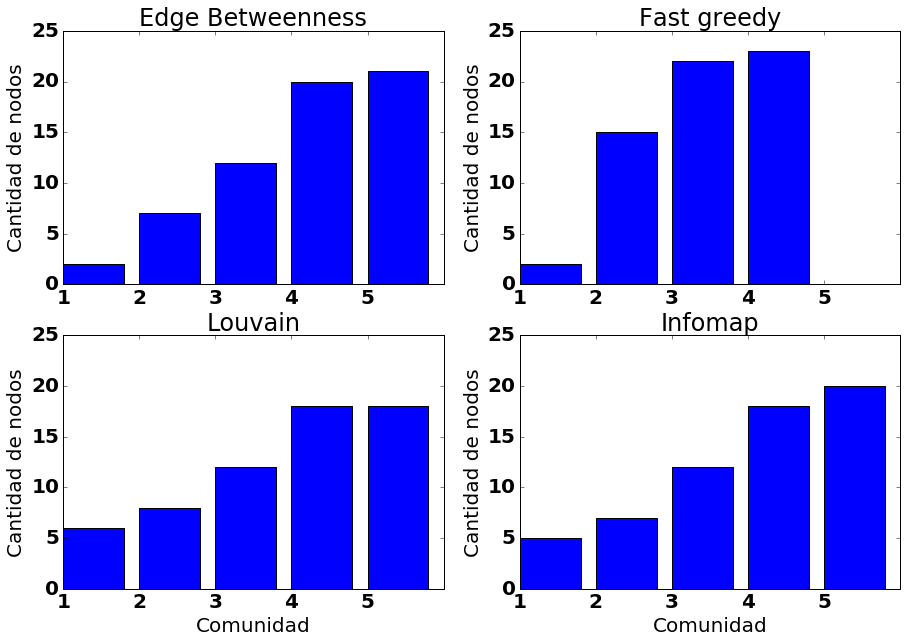

In [168]:
#puedo verlo en barras

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 20}

plt.rc('font', **font)
#plt.title("Cantidad de nodos por comunidad")

plt.figure(figsize=(15,10))

plt.subplot(221)
plt.title("Edge Betweenness")
plt.bar([1,2,3,4,5],eb)
plt.xticks([1, 2, 3, 4,5])
#plt.xlabel("Comunidad")
plt.ylabel("Cantidad de nodos")
plt.ylim([0,25])

plt.subplot(222)
plt.title("Fast greedy")
plt.bar([1,2,3,4,5],fg)
plt.xticks([1, 2, 3, 4,5])
#plt.xlabel("Comunidad")
plt.ylabel("Cantidad de nodos")
plt.ylim([0,25])

plt.subplot(223)
plt.title("Louvain")
plt.bar([1,2,3,4,5],l)
plt.xticks([1, 2, 3, 4,5])
plt.xlabel("Comunidad")
plt.ylabel("Cantidad de nodos")
plt.ylim([0,25])


plt.subplot(224)
plt.title("Infomap")
plt.bar([1,2,3,4,5],im)
plt.xticks([1, 2, 3, 4,5])
plt.xlabel("Comunidad")
plt.ylabel("Cantidad de nodos")
plt.ylim([0,25])

In [ ]:
#ya lo da en forma de vector 
eb = amountNodesPerComm(EdgeBet,ordenEBF)
fg = amountNodesPerComm(FastGredy, ordenFGF)
im = amountNodesPerComm(InfoMap, ordenIMF)
l = amountNodesPerComm(Louvain, ordenLF)

#la prob conjunta es ProbConj2(attrib1, attrib2, ordencom1, ordencom2)

In [224]:
def InfoMutua(attrib1, attrib2, ordencom1,ordencom2):
    probConj = ProbConj2(attrib1, attrib2, ordencom1, ordencom2)
    probC1 = amountNodesPerCommNormalized(attrib1,ordencom1)
    probC2 = amountNodesPerCommNormalized(attrib2,ordencom2)
    info = 0
    entropia1 = 0
    for k in probC1:
        entropia1 = entropia1 - k * np.log(k) 
    entropia2 = 0
    for j in probC2:
        entropia2 = entropia2 - j * np.log(j)
    for i in range(max(attrib1.values())+1):
        for j in range(max(attrib2.values())+1):
            if probConj[i,j] != 0:
                info = info + probConj[i,j] * np.log (probConj[i,j]/(probC1[i]*probC2[j]))
    infoMutua = (2*info) / (entropia1 + entropia2)
    return infoMutua

In [225]:
InfoMutua(EdgeBet, FastGredy, ordenEBF,ordenFGF)

0.52693966771054868

In [232]:

#InfoMutua(EdgeBet, FastGredy, ordenEBF,ordenFGF)
#InfoMutua(EdgeBet, Louvain, ordenEBF,ordenLF)
#InfoMutua(EdgeBet, InfoMap, ordenEBF,ordenIMF)
#InfoMutua(Louvain, FastGredy, ordenLF,ordenFGF)
#InfoMutua(InfoMap, FastGredy, ordenIMF,ordenFGF)
InfoMutua(Louvain, InfoMap, ordenLF,ordenIMF)

    

0.78792200905046594